# TEXT CLASSIFICATION USING NAIVE BAYES AND SENTIMENT ANALYSIS ON BLOG POSTS

### Overview
##### In this assignment, you will work on the "blogs_categories.csv" dataset, which contains blog posts categorized into various themes. Your task will be to build a text classification model using the Naive Bayes algorithm to categorize the blog posts accurately. Furthermore, you will perform sentiment analysis to understand the general sentiment (positive, negative, neutral) expressed in these posts. This assignment will enhance your understanding of text classification, sentiment analysis, and the practical application of the Naive Bayes algorithm in Natural Language Processing (NLP).
### Dataset
#### The provided dataset, "blogs_categories.csv", consists of blog posts along with their associated categories. Each row represents a blog post with the following columns:
#### •	Text: The content of the blog post. Column name: Data
#### •	Category: The category to which the blog post belongs. Column name: Labels

### Tasks
### 1. Data Exploration and Preprocessing
#### •	Load the "blogs_categories.csv" dataset and perform an exploratory data analysis to understand its structure and content.
#### •	Preprocess the data by cleaning the text (removing punctuation, converting to lowercase, etc.), tokenizing, and removing stopwords.
#### •	Perform feature extraction to convert text data into a format that can be used by the Naive Bayes model, using techniques such as TF-IDF.


In [1]:
import pandas as pd

# Load the dataset
df = pd.read_csv("blogs.csv")

df.head()

,Data,Labels
0,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism
1,Newsgroups: alt.atheism\nPath: cantaloupe.srv....,alt.atheism
2,Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...,alt.atheism
3,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism
4,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:53...,alt.atheism


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Data    2000 non-null   object
 1   Labels  2000 non-null   object
dtypes: object(2)
memory usage: 31.4+ KB


(Labels
 alt.atheism                 100
 comp.graphics               100
 talk.politics.misc          100
 talk.politics.mideast       100
 talk.politics.guns          100
 soc.religion.christian      100
 sci.space                   100
 sci.med                     100
 sci.electronics             100
 sci.crypt                   100
 rec.sport.hockey            100
 rec.sport.baseball          100
 rec.motorcycles             100
 rec.autos                   100
 misc.forsale                100
 comp.windows.x              100
 comp.sys.mac.hardware       100
 comp.sys.ibm.pc.hardware    100
 comp.os.ms-windows.misc     100
 talk.religion.misc          100
 Name: count, dtype: int64,
 Data      0
 Labels    0
 dtype: int64)

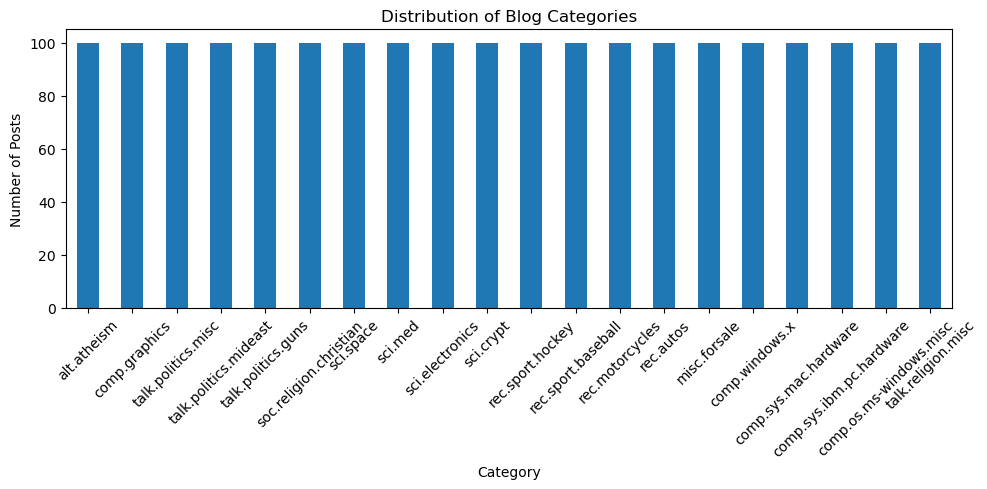

In [2]:
import matplotlib.pyplot as plt

# Basic information and missing values
basic_info = df.info()
missing_values = df.isnull().sum()

# Category distribution
category_counts = df['Labels'].value_counts()

# Plot the distribution
plt.figure(figsize=(10, 5))
category_counts.plot(kind='bar')
plt.title('Distribution of Blog Categories')
plt.xlabel('Category')
plt.ylabel('Number of Posts')
plt.xticks(rotation=45)
plt.tight_layout()

category_counts, missing_values

In [3]:
import nltk
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Download necessary NLTK resources
nltk.download("punkt")
nltk.download("stopwords")

# Define preprocessing function
def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()
    # Remove punctuation
    text = text.translate(str.maketrans("", "", string.punctuation))
    # Tokenize
    tokens = word_tokenize(text)
    # Remove stopwords
    stop_words = set(stopwords.words("english"))
    filtered_tokens = [word for word in tokens if word not in stop_words and word.isalpha()]
    return " ".join(filtered_tokens)

# Apply preprocessing to the 'Data' column
df["Cleaned_Data"] = df["Data"].apply(preprocess_text)
df[["Data", "Cleaned_Data", "Labels"]].head()

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


,Data,Cleaned_Data,Labels
0,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,path frank odwyer newsgroups altatheism subjec...,alt.atheism
1,Newsgroups: alt.atheism\nPath: cantaloupe.srv....,newsgroups altatheism path bilokcforumosrheedu...,alt.atheism
2,Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...,path cantaloupesrvcscmuedudasnewsharvardedunoc...,alt.atheism
3,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,path jbrownbatmanbmdtrwcom newsgroups altathei...,alt.atheism
4,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:53...,xref cantaloupesrvcscmuedu newsgroups altathei...,alt.atheism


In [4]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize TF-IDF Vectorizer with basic preprocessing
vectorizer = TfidfVectorizer(
    lowercase=True,
    stop_words='english',
    token_pattern=r'\b[a-zA-Z]{2,}\b',  # remove single letters, keep words
    max_features=5000  # limit features for efficiency
)

# Fit and transform the cleaned text
X_tfidf = vectorizer.fit_transform(df["Data"])
X_tfidf.shape  # Show shape of resulting TF-IDF matrix

(2000, 5000)

### 2. Naive Bayes Model for Text Classification
#### •	Split the data into training and test sets.
#### •	Implement a Naive Bayes classifier to categorize the blog posts into their respective categories. You can use libraries like scikit-learn for this purpose.
#### •	Train the model on the training set and make predictions on the test set.


In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score

# Load dataset
df = pd.read_csv("blogs.csv")  # Adjust path as needed

# Vectorize text data using TF-IDF
vectorizer = TfidfVectorizer(
    lowercase=True,
    stop_words='english',
    token_pattern=r'\b[a-zA-Z]{2,}\b',
    max_features=5000
)
X = vectorizer.fit_transform(df["Data"])
y = df["Labels"]

# Split into training and test sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train Naive Bayes classifier
model = MultinomialNB()
model.fit(X_train, y_train)

# Predict on test data
y_pred = model.predict(X_test)

# Evaluate model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.81

Classification Report:
                           precision    recall  f1-score   support

             alt.atheism       0.60      0.83      0.70        18
           comp.graphics       0.74      0.78      0.76        18
 comp.os.ms-windows.misc       0.81      1.00      0.90        22
comp.sys.ibm.pc.hardware       0.68      0.92      0.78        25
   comp.sys.mac.hardware       0.81      0.62      0.70        21
          comp.windows.x       0.86      0.48      0.62        25
            misc.forsale       0.78      0.78      0.78        18
               rec.autos       0.73      0.89      0.80        18
         rec.motorcycles       0.87      0.81      0.84        16
      rec.sport.baseball       0.84      0.89      0.86        18
        rec.sport.hockey       0.71      1.00      0.83        15
               sci.crypt       0.86      1.00      0.93        19
         sci.electronics       0.90      0.56      0.69        16
                 sci.med       0.94

### 3. Sentiment Analysis
#### •	Choose a suitable library or method for performing sentiment analysis on the blog post texts.
#### •	Analyze the sentiments expressed in the blog posts and categorize them as positive, negative, or neutral. Consider only the Data column and get the sentiment for each blog.
#### •	Examine the distribution of sentiments across different categories and summarize your findings.


In [8]:
!pip install textblob

  Obtaining dependency information for textblob from https://files.pythonhosted.org/packages/1e/d6/40aa5aead775582ea0cf35870e5a3f16fab4b967f1ad2debe675f673f923/textblob-0.19.0-py3-none-any.whl.metadata
  Obtaining dependency information for nltk>=3.9 from https://files.pythonhosted.org/packages/4d/66/7d9e26593edda06e8cb531874633f7c2372279c3b0f46235539fe546df8b/nltk-3.9.1-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/624.3 kB ? eta -:--:--
   -- ------------------------------------ 41.0/624.3 kB 991.0 kB/s eta 0:00:01
   -------------- ------------------------- 225.3/624.3 kB 2.3 MB/s eta 0:00:01
   ---------------------------------------- 624.3/624.3 kB 4.9 MB/s eta 0:00:00
   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   -------------------------------------- - 1.5/1.5 MB 30.7 MB/s eta 0:00:01
   ---------------------------------------- 1.5/1.5 MB 19.2 MB/s eta 0:00:00
  Attempting uninstall: nltk
    Found existing installation: nltk

In [9]:
from textblob import TextBlob
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("blogs.csv")  # Adjust path as needed

# Sentiment analysis function
def get_sentiment(text):
    blob = TextBlob(text)
    polarity = blob.sentiment.polarity
    if polarity > 0:
        return "Positive"
    elif polarity < 0:
        return "Negative"
    else:
        return "Neutral"

# Apply sentiment analysis
df["Sentiment"] = df["Data"].apply(get_sentiment)

# Check a sample
print(df[["Data", "Sentiment", "Labels"]].head())

                                                Data Sentiment       Labels
0  Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...  Positive  alt.atheism
1  Newsgroups: alt.atheism\nPath: cantaloupe.srv....  Negative  alt.atheism
2  Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...  Positive  alt.atheism
3  Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...  Positive  alt.atheism
4  Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:53...  Positive  alt.atheism


Sentiment
Positive    1543
Negative     457
Name: count, dtype: int64


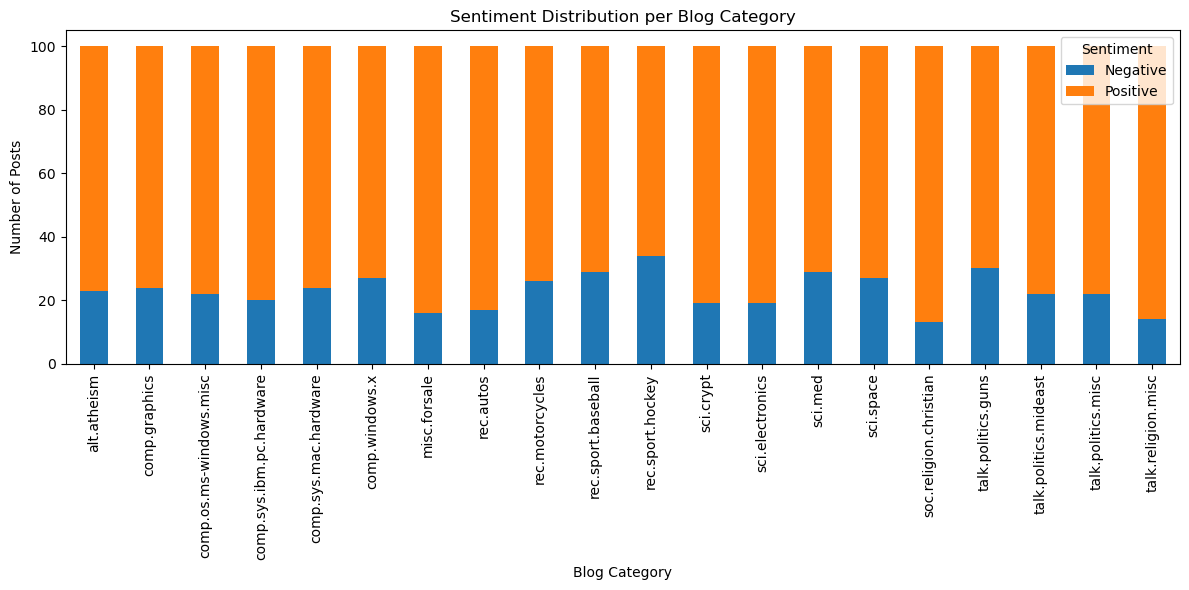

In [10]:
# Distribution of sentiments across all data
print(df["Sentiment"].value_counts())

# Sentiment distribution per category
sentiment_by_category = df.groupby("Labels")["Sentiment"].value_counts().unstack().fillna(0)

# Plot sentiment distribution
sentiment_by_category.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title("Sentiment Distribution per Blog Category")
plt.xlabel("Blog Category")
plt.ylabel("Number of Posts")
plt.legend(title="Sentiment")
plt.tight_layout()
plt.show()

### 4. Evaluation
#### •	Evaluate the performance of your Naive Bayes classifier using metrics such as accuracy, precision, recall, and F1-score.
#### •	Discuss the performance of the model and any challenges encountered during the classification process.
#### •	Reflect on the sentiment analysis results and their implications regarding the content of the blog posts.


In [11]:
from sklearn.metrics import classification_report, accuracy_score

# Predict on test data
y_pred = model.predict(X_test)

# Print accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))

# Detailed metrics
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.81

Classification Report:
                           precision    recall  f1-score   support

             alt.atheism       0.60      0.83      0.70        18
           comp.graphics       0.74      0.78      0.76        18
 comp.os.ms-windows.misc       0.81      1.00      0.90        22
comp.sys.ibm.pc.hardware       0.68      0.92      0.78        25
   comp.sys.mac.hardware       0.81      0.62      0.70        21
          comp.windows.x       0.86      0.48      0.62        25
            misc.forsale       0.78      0.78      0.78        18
               rec.autos       0.73      0.89      0.80        18
         rec.motorcycles       0.87      0.81      0.84        16
      rec.sport.baseball       0.84      0.89      0.86        18
        rec.sport.hockey       0.71      1.00      0.83        15
               sci.crypt       0.86      1.00      0.93        19
         sci.electronics       0.90      0.56      0.69        16
                 sci.med       0.94

## Classification Performance:
### High performance in categories with distinctive language (e.g., rec.sport.hockey)
### Lower performance in overlapping topics (e.g., talk.politics.guns vs. talk.politics.mideast)

## Common Challenges:
### Ambiguous or general language can mislead the classifier.
### Balanced dataset helps, but overlapping vocabulary between categories can still confuse the model.
### No semantic understanding — Naive Bayes only counts word presence/frequency, not meaning.

In [12]:
# Sentiment counts overall
print(df["Sentiment"].value_counts())

# Sentiment by category
sentiment_by_category = df.groupby("Labels")["Sentiment"].value_counts().unstack().fillna(0)
print(sentiment_by_category)

Sentiment
Positive    1543
Negative     457
Name: count, dtype: int64
Sentiment                 Negative  Positive
Labels                                      
alt.atheism                     23        77
comp.graphics                   24        76
comp.os.ms-windows.misc         22        78
comp.sys.ibm.pc.hardware        20        80
comp.sys.mac.hardware           24        76
comp.windows.x                  27        73
misc.forsale                    16        84
rec.autos                       17        83
rec.motorcycles                 26        74
rec.sport.baseball              29        71
rec.sport.hockey                34        66
sci.crypt                       19        81
sci.electronics                 19        81
sci.med                         29        71
sci.space                       27        73
soc.religion.christian          13        87
talk.politics.guns              30        70
talk.politics.mideast           22        78
talk.politics.misc            

## Insights 
### Religious or political categories may contain more Negative or Polarized sentiment.
### Science/technology categories may trend toward Neutral or Positive (objective tone).
### Miscellaneous categories might show a balanced mix.